In [0]:
from singlestep import *

from math import sqrt
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.layers.merge import concatenate
from keras.callbacks import History, ModelCheckpoint
from keras import optimizers
from keras.engine.input_layer import Input
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [0]:
def n_split(data):  #CORRECT
    train,test=data[0:365*24*1+24*30*4],data[365*24*1+24*30*4:365*24*1+24*30*6]
    train=np.split(train,len(train)/24)
    test=np.split(test,len(test)/24)
    return np.array(train),np.array(test)

In [0]:
def main():

  data_fp=[]
  data_fp.insert(0,'/content/Aotizhongxinpreproc.csv')
  data_fp.insert(1,'/content/Dongsipreproc.csv')
  data_fp.insert(2,'/content/Guanyuanpreproc.csv')
  data_fp.insert(3,'/content/Guchengpreproc.csv')
  data_fp.insert(4,'/content/Huairoupreproc.csv')
  data_fp.insert(5,'/content/Nongzhanguanpreproc.csv')
  data_fp.insert(6,'/content/Shunyipreproc.csv')
  data_fp.insert(7,'/content/Tiantanpreproc.csv')
  data_fp.insert(8,'/content/Wanliupreproc.csv')
  data_fp.insert(9,'/content/Wanshouxigongpreproc.csv')
  
  i=0
  for city in data_fp:
    print(city)
    data=pd.read_csv(city,header=0,parse_dates=True,index_col=['No'])
    n_input=6
    min=data['PM2.5'].min()
    max=data['PM2.5'].max() 
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
      
    train,test=n_split(data)
    print(train.shape)
    print(test.shape)
    train_x,train_y=to_supervised(train,n_input,1)
    n_timesteps,n_features,n_outputs=train_x.shape[1],train_x.shape[2],train_y.shape[1]
    print(train_x.shape)
    print(train_y.shape)

    model=CNN_GRU(n_timesteps)
    history = fit_model(train_x,train_y,model,0,0)
    scores,final_score= model_eval(train,test,n_input,model,24,0)
    scores=[t*(max-min)+min for t in scores]
    print(scores)
    print(final_score*(max-min)+min)

    filename = 'fm'+str(i)+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    os.remove('/content/best_weights0.hdf5')
    i=i+1



/content/Aotizhongxinpreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6, 1)         0                                            
______

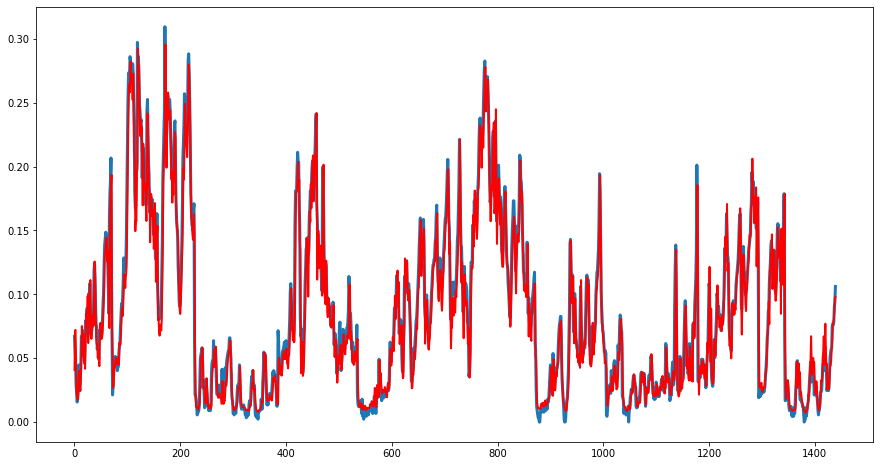

[16.780511279682184, 18.806483165465185, 17.24224531878586, 21.69098754905438, 15.873518292288948, 15.807706610198172, 13.709365293956045, 17.244174833749526, 13.23718495798419, 18.929536872760984, 14.025922004537428, 17.202593511255426, 13.727885195961969, 18.111084159985992, 14.121263192585738, 14.237515290528085, 16.265970893425788, 17.164139465301446, 17.483589251106775, 16.54319119730006, 13.555734804734366, 17.542875272574612, 20.58880881051774, 24.613093397954586]
17.118157837681025
/content/Dongsipreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_17 (In

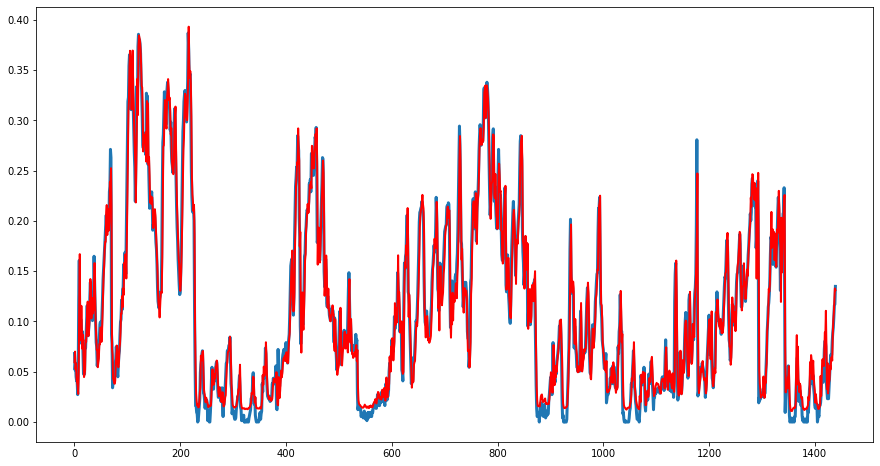

[17.9021668643613, 18.826349278618437, 18.711766132751446, 17.939331108070682, 16.156254026341827, 17.11776429781736, 14.815482231668659, 18.681904294037036, 16.706787041783997, 13.80695304619226, 19.304384526004966, 16.28485910160301, 15.337879530944717, 16.218192745940964, 14.922900112185369, 13.759889075502866, 17.583327711205513, 18.303755581847632, 14.479600847112199, 18.465045900404995, 14.292741021529352, 14.588668707675787, 25.151360419859255, 19.772568950878675]
17.265387632616694
/content/Guanyuanpreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_32 (

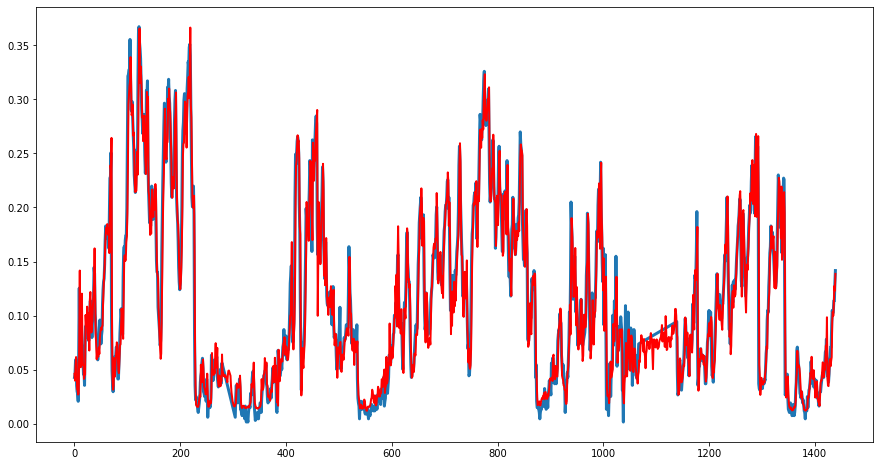

[15.105506815456302, 16.496687822442198, 15.599653171095136, 17.321153341366006, 13.970054212989336, 14.675829333378854, 13.821889195009202, 14.248606766761188, 12.663158431888627, 14.338654037024225, 18.167903174080195, 14.574041919712263, 13.509723378850646, 13.32976528696805, 13.900962208093484, 13.506813743807827, 15.612522534944016, 15.800297383759512, 15.661857247168433, 14.879818550389723, 13.48245116855089, 14.725901677594255, 24.815053423379755, 14.319396049709963]
15.400940997804238
/content/Guchengpreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_46 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_47

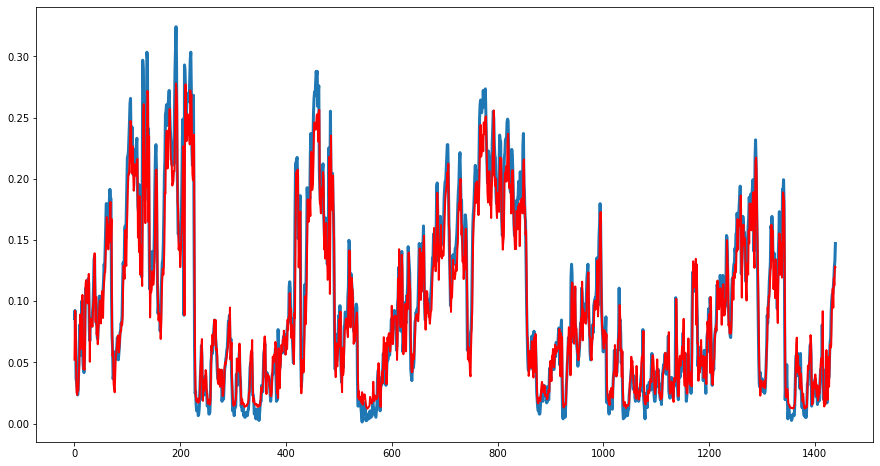

[15.810562771010598, 18.337914714288683, 20.725481161680655, 19.831343501792908, 18.48427680192693, 15.409212563102994, 12.253474602087413, 16.077716308487176, 17.607512099585904, 23.460023895179702, 17.627601108083017, 15.680701559031508, 14.643954332620723, 13.868427978132384, 15.383617359264937, 15.685924719815512, 25.49480310334865, 13.162441045370066, 12.723193789675378, 15.079717534849117, 16.98479177047797, 15.892837270524144, 17.227882289827278, 16.95250670314989]
17.165025234242698
/content/Huairoupreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_61 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_62 (

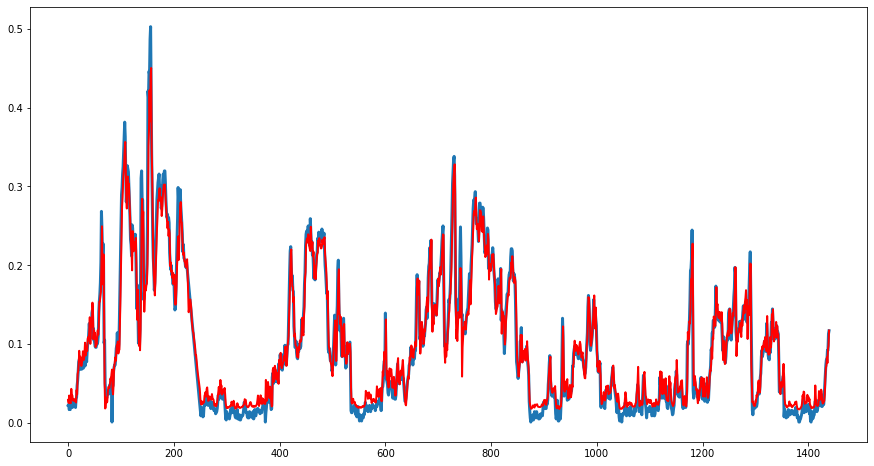

[14.232101744970123, 18.92863062149925, 13.3417563724394, 14.315023596262776, 13.451305714977687, 13.47686240173645, 16.90648955642523, 22.084985388177497, 15.288538543968944, 15.345713819726958, 14.010240653597545, 19.33410581586411, 14.887053108452825, 13.490892192056707, 14.342339300378008, 16.72308828163447, 14.479512616565716, 16.458145569940264, 19.819564191525487, 13.36413556719701, 11.370457963522247, 14.84432568061286, 13.316909911647713, 14.163707174854673]
15.558293652311626
/content/Nongzhanguanpreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_77 (

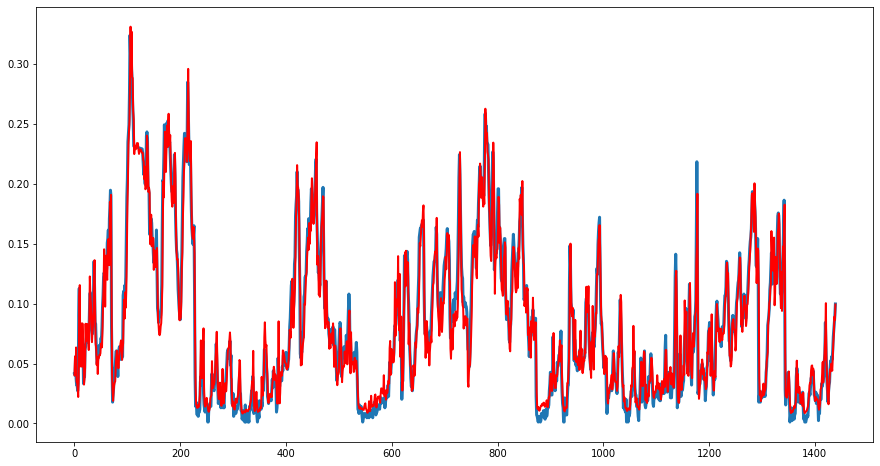

[13.139877264132064, 16.468965894877947, 16.94189192909026, 16.734701352939318, 14.317938678277134, 14.062446007775584, 12.113970958090128, 12.400252264441857, 14.823989307417076, 13.54287679066503, 14.377669935760986, 12.34552435634342, 14.407447705773224, 12.970327374768313, 12.80454214079516, 11.590855158010381, 12.323340997443214, 12.286343868146858, 13.706033474781426, 13.104190950076752, 12.202419379743652, 11.494783266429769, 17.63146985535048, 16.443717514580804]
13.976321518688993
/content/Shunyipreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_91 (InputLayer)           (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_92 (In

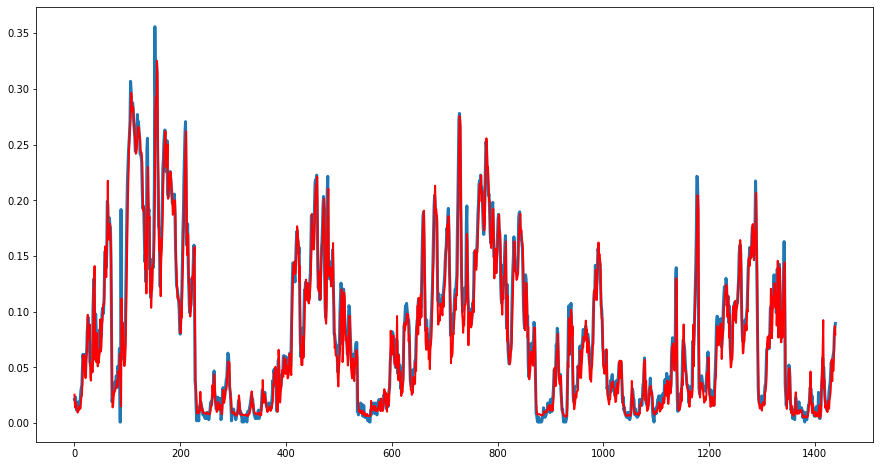

[18.55676545972561, 16.758288230269976, 16.90421202821306, 15.268272537760103, 19.98882726228708, 13.106898264714005, 11.358685739465232, 14.159402296158703, 23.454372402939924, 14.00521003458743, 13.499807126216076, 18.867757301372958, 13.961113328808413, 15.156659999716672, 17.220543025699783, 15.513268671920146, 27.540831314831628, 20.367517967666785, 14.547984618319767, 14.531607459470438, 12.395516399529118, 16.633857824064123, 17.956402207831925, 16.060967500909996]
17.00397389202017
/content/Tiantanpreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_106 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_107 (

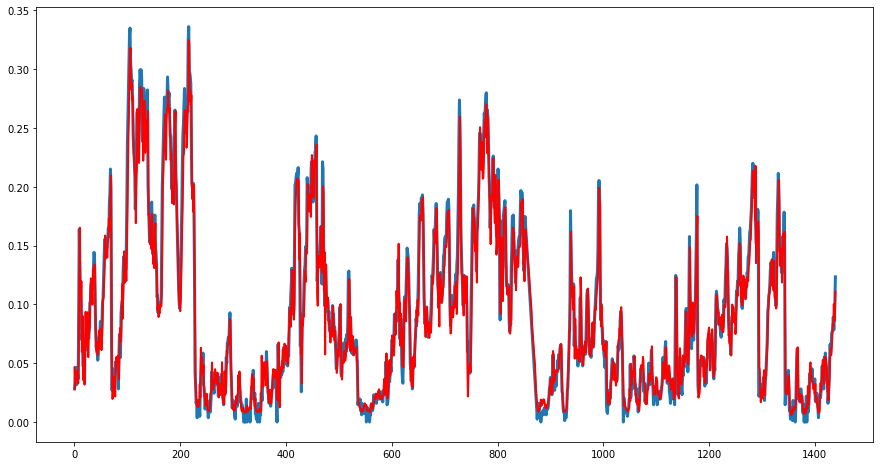

[16.526816981622424, 13.953310940909882, 20.90676278038718, 16.42183376823011, 15.48558513772917, 15.730894716778588, 14.572119385759688, 15.646460150208124, 19.764443066617375, 17.22638861231849, 16.433330684013193, 15.67428543153817, 16.193072378945708, 19.606296968295396, 16.03515971026512, 14.933823153985937, 15.460643437376588, 13.034065404438444, 16.551077742923642, 17.235654395098962, 14.329680126095747, 14.820369391683, 24.00787922957981, 16.366191471533753]
16.742499253189433
/content/Wanliupreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_121 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
input_122 (InputL

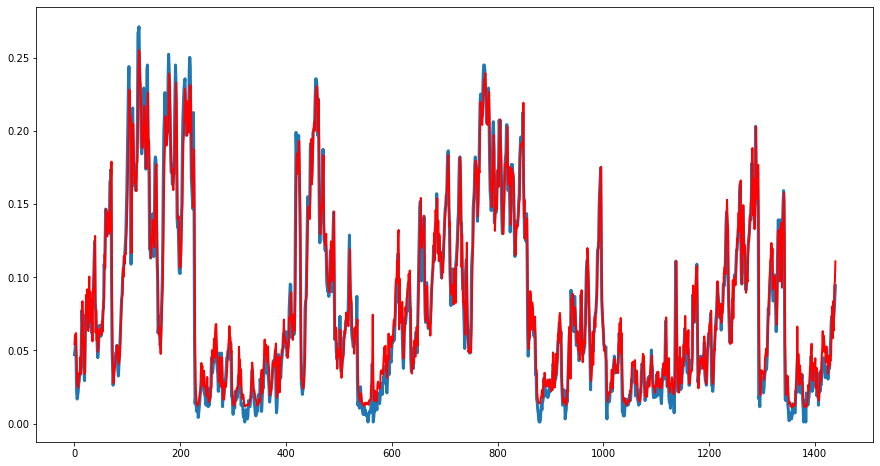

[16.357389362406117, 15.233667971440285, 15.490875412852485, 13.885801498823815, 15.01470049618204, 14.401317382555092, 14.246031838901448, 16.550529745100896, 15.423017991782421, 17.879752766016626, 16.04034126298675, 23.35994404932624, 22.37638970071357, 14.368528647412955, 15.367541851858359, 15.85763435451654, 14.595755826827242, 17.337964087373688, 12.421079079975595, 12.948819107642256, 11.268981238970161, 13.057387371036134, 22.996097204771324, 18.379986522386083]
16.366810485112048
/content/Wanshouxigongpreproc.csv
(485, 24, 15)
(60, 24, 15)
(11634, 6, 15)
(11634, 1)
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_136 (InputLayer)          (None, 6, 1)         0                                            
__________________________________________________________________________________________________
inpu

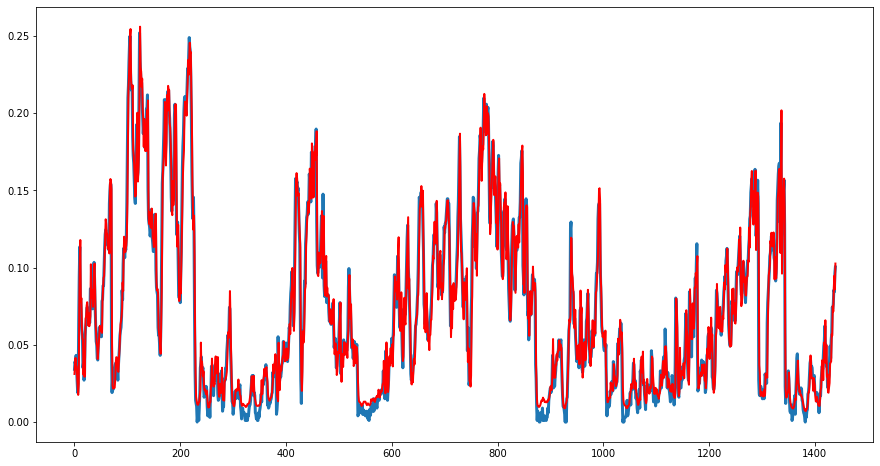

[13.63995297634025, 14.00759915055038, 18.892398085688136, 14.985247684595148, 15.280327571116262, 14.109543146382213, 14.420298897952872, 13.425608607456132, 17.428451040598702, 14.347318317003795, 14.529667453379615, 15.798062186910458, 13.287337871021482, 12.66596343963218, 16.639358048919288, 14.021097137123252, 15.546392760891887, 16.781562740628573, 12.966986881006918, 16.575646422401615, 12.688696361506171, 11.229474942578086, 22.334150453708066, 15.244471367863891]
15.248590985030534


In [0]:
if __name__=='__main__':
  main()